<a href="https://colab.research.google.com/github/jjavy/MCDAA/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Maestria/AA/Coffe_sales_cleaned.csv')
display(df)

,Date,hour_of_day,cash_type,money,coffee_ordered,Time_of_Day,Weekdaysort,Monthsort,Time
0,2024-03-01,10,1,38.70,3,0,5,3,10:15:50.520000
1,2024-03-01,12,1,38.70,8,1,5,3,12:19:22.539000
2,2024-03-01,12,1,38.70,8,1,5,3,12:20:18.089000
3,2024-03-01,13,1,28.90,1,1,5,3,13:46:33.006000
4,2024-03-01,13,1,38.70,3,1,5,3,13:48:14.626000
...,...,...,...,...,...,...,...,...,...
3542,2025-03-23,10,1,35.76,4,0,7,3,10:34:54.894000
3543,2025-03-23,14,1,35.76,7,1,7,3,14:43:37.362000
3544,2025-03-23,14,1,35.76,7,1,7,3,14:44:16.864000
3545,2025-03-23,15,1,25.96,1,1,7,3,15:47:28.723000


## Filtrado de datos

In [6]:
x = df[[
    'hour_of_day',
    'coffee_ordered',
    'Time_of_Day',
    'Weekdaysort',
    'Monthsort'
]]
y = df['money']

display(x)
display(y)

,hour_of_day,coffee_ordered,Time_of_Day,Weekdaysort,Monthsort
0,10,3,0,5,3
1,12,8,1,5,3
2,12,8,1,5,3
3,13,1,1,5,3
4,13,3,1,5,3
...,...,...,...,...,...
3542,10,4,0,7,3
3543,14,7,1,7,3
3544,14,7,1,7,3
3545,15,1,1,7,3


,money
0,38.70
1,38.70
2,38.70
3,28.90
4,38.70
...,...
3542,35.76
3543,35.76
3544,35.76
3545,25.96


In [7]:
from sklearn.feature_selection import f_regression

In [8]:
valor_f = f_regression(x, y)
display(valor_f)

(array([151.97034402, 400.17694836, 156.47290079,   1.0568981 ,
          8.90010654]),
 array([3.19994550e-34, 1.94924810e-84, 3.64913416e-35, 3.03993863e-01,
        2.87098245e-03]))

In [12]:
accepted = []
rejected = []

for i in range(len(valor_f[0])):
  if valor_f[0][i] > 1:
    accepted.append(x.columns[i])
  else:
    rejected.append(x.columns[i])

print('Pasan el test:\t\t', accepted)
print('No pasan el test:\t', rejected)

Pasan el test:		 ['hour_of_day', 'coffee_ordered', 'Time_of_Day', 'Weekdaysort', 'Monthsort']
No pasan el test:	 []


In [13]:
pd.DataFrame(valor_f[0], index = x.columns, columns = ['Valor F'])

,Valor F
hour_of_day,151.970344
coffee_ordered,400.176948
Time_of_Day,156.472901
Weekdaysort,1.056898
Monthsort,8.900107


## Aplicar modelos de selección de características

In [14]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [17]:
lr = LinearRegression()
efs = EFS(lr, min_features = 1, max_features = 5, scoring = 'neg_mean_absolute_error')

efs = efs.fit(x, y)

Features: 31/31

In [21]:
print('Mejor puntuación:\t', efs.best_score_)
print('Mejores características:', efs.best_feature_names_)

Mejor puntuación:	 -3.7047205678762487
Mejores características: ('coffee_ordered', 'Time_of_Day')


In [22]:
df_res = pd.DataFrame(efs.get_metric_dict()).T
df_res = df_res.sort_values(by = 'avg_score', ascending = False)
df_res

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(1, 2)","[-4.497340135752046, -4.135244560292838, -3.31...",-3.704721,"(coffee_ordered, Time_of_Day)",0.65888,0.512631,0.256315
21,"(1, 2, 3)","[-4.511614236259931, -4.135704855132445, -3.31...",-3.705732,"(coffee_ordered, Time_of_Day, Weekdaysort)",0.666623,0.518655,0.259328
15,"(0, 1, 2)","[-4.496485812371496, -4.135582425248629, -3.32...",-3.7074,"(hour_of_day, coffee_ordered, Time_of_Day)",0.655907,0.510318,0.255159
25,"(0, 1, 2, 3)","[-4.511648619722345, -4.136055896673249, -3.32...",-3.708838,"(hour_of_day, coffee_ordered, Time_of_Day, Wee...",0.663776,0.51644,0.25822
5,"(0, 1)","[-4.504533660430595, -4.1424712831832755, -3.3...",-3.709774,"(hour_of_day, coffee_ordered)",0.662009,0.515066,0.257533
16,"(0, 1, 3)","[-4.5263616236198265, -4.143004228195107, -3.3...",-3.712102,"(hour_of_day, coffee_ordered, Weekdaysort)",0.673095,0.52369,0.261845
1,"(1,)","[-4.616413396412051, -4.254546114392415, -3.26...",-3.731007,"(coffee_ordered,)",0.753822,0.586499,0.29325
10,"(1, 3)","[-4.637058072451017, -4.254957831539284, -3.25...",-3.733687,"(coffee_ordered, Weekdaysort)",0.763549,0.594067,0.297033
22,"(1, 2, 4)","[-4.485512769308518, -4.1179125404968735, -3.4...",-3.765067,"(coffee_ordered, Time_of_Day, Monthsort)",0.602427,0.468709,0.234354
26,"(0, 1, 2, 4)","[-4.483401652620958, -4.117168325791675, -3.43...",-3.765909,"(hour_of_day, coffee_ordered, Time_of_Day, Mon...",0.600475,0.46719,0.233595


In [23]:
import matplotlib.pyplot as plt

[]

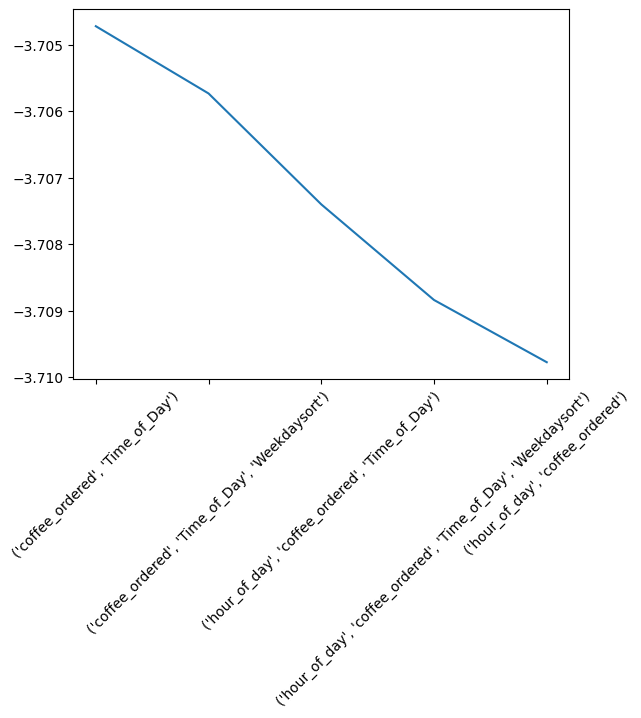

In [24]:
plt.figure()

plt.plot(
    df_res.iloc[:5].feature_names.astype(str),
    df_res.iloc[:5].avg_score,
)
plt.xticks(rotation = 45)

plt.plot()

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [28]:
sfs = SFS(lr, k_features = (1, 5), forward = False, scoring = 'neg_mean_absolute_error')

sfs = sfs.fit(x, y)

In [33]:
print('K puntuación:\t\t', sfs.k_score_)
print('K características:\t', sfs.k_feature_names_)

K puntuación:		 -3.7047205678762487
K características:	 ('coffee_ordered', 'Time_of_Day')


In [34]:
pd.DataFrame(sfs.subsets_).T.sort_values('avg_score', ascending = False)

,feature_idx,cv_scores,avg_score,feature_names
2,"(1, 2)","[-4.497340135752046, -4.135244560292838, -3.31...",-3.704721,"(coffee_ordered, Time_of_Day)"
3,"(1, 2, 3)","[-4.511614236259931, -4.135704855132445, -3.31...",-3.705732,"(coffee_ordered, Time_of_Day, Weekdaysort)"
4,"(0, 1, 2, 3)","[-4.511648619722345, -4.136055896673249, -3.32...",-3.708838,"(hour_of_day, coffee_ordered, Time_of_Day, Wee..."
1,"(1,)","[-4.616413396412051, -4.254546114392415, -3.26...",-3.731007,"(coffee_ordered,)"
5,"(0, 1, 2, 3, 4)","[-4.501718720959666, -4.117723598469421, -3.42...",-3.767741,"(hour_of_day, coffee_ordered, Time_of_Day, Wee..."


## Otras métricas para los datos presentes

#### Recursive Feature Elimination (FER)
Dado un estimador externo que asigna pesos a las variables (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la **eliminación recursiva de características** (*Recursive Feature Elimination*, RFE) es seleccionar las variables considerando de forma recursiva conjuntos cada vez más pequeños.

Primero, se entrena el estimador con el conjunto inicial de variables y se obtiene la importancia de cada una, ya sea a través de un atributo específico o una función que la calcule. Luego, se eliminan las variables menos importantes del conjunto actual. Este procedimiento se repite recursivamente sobre el conjunto reducido hasta alcanzar el número deseado de variables a seleccionar.


### Fuentes:

Scikit-learn developers. (s. f.). 1.13. RFE. Recuperado el 9 de octubre de 2025, de https://doi.org/10.5281/zenodo.13905622
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.htm


---


Scikit-learn developers. Feature selection. Scikit-learn. Recuperado el 9 de octubre de 2025, de https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.htm

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x, y)
ranking = rfe.ranking_
print(ranking)

[5 2 1 4 3]


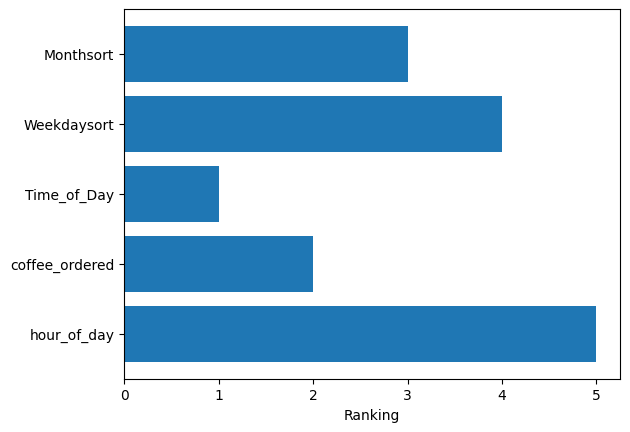

In [62]:
# Plot pixel ranking
plt.figure()
plt.barh(range(len(ranking)), ranking, align="center")
plt.yticks(range(len(ranking)), x.columns)
plt.xlabel("Ranking")
plt.show()

## Conclusión

Con base en los resultados de los distintos métodos de selección de características se puede concluir que, las características *coffee_ordered* y *Time_of_Day* resultan ser las más relevantes porque están directamente relacionadas con el comportamiento de consumo que influye en el monto de dinero gastado. El café pedido (*coffee_ordered*) tiene una relación evidente y casi proporcional con el gasto dada la complejidad y/o los ingredientes de la bebida que aumentan el costo. Por otro lado, *Time_of_Day* refleja patrones de demanda asociados a momentos específicos del día —por ejemplo, es probable que las ventas sean mayores durante las mañanas o en horarios de descanso—, lo cual explica su fuerte capacidad predictiva.

En contraste, variables como *Weekdaysort*, *Monthsort* o *hour_of_day* pueden influir, pero de manera más indirecta o menos consistente. Es posible que el día de la semana o el mes tengan algún efecto (por ejemplo, más ventas los lunes o en invierno), pero su impacto no es tan inmediato ni universal como el tipo de café pedido o el momento del día. Además, estas variables pueden estar correlacionadas parcialmente con *Time_of_Day*, lo que reduce su aporte único al modelo.

En resumen, las variables seleccionadas son las más relevantes porque capturan los factores que explican de forma directa y constante la variación en el gasto, mientras que las demás aportan información redundante o con menor poder explicativo.

